In [30]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

data = pd.read_csv('Fortnite_players_stats.csv')
## look at the data
data.head()

,Player,Solo score,Solo top1,Solo kd,Solo winRatio,Solo matches,Solo kills,Solo minutesPlayed,Duos score,Duos top1,...,Squads kills,Squads minutesPlayed,LTM score,LTM top1,LTM top3,LTM kd,LTM winRatio,LTM matches,LTM kills,LTM minutesPlayed
0,Prospеring,2476763,1828,4.37,18.0,10150,36328,81389,4702684,5584,...,75787.0,117967.0,101589.0,170.0,118.0,5.78,26.8,634.0,2682.0,2865.0
1,BH nixxxay,439562,1694,8.71,29.1,5817,35895,12732,4065613,4141,...,117327.0,150439.0,151358.0,229.0,190.0,8.20,18.2,1259.0,8442.0,4206.0
2,Raпger,4519465,4582,9.60,34.0,13488,85481,122171,1137279,1390,...,76065.0,86684.0,452136.0,1180.0,818.0,11.12,32.9,3583.0,26726.0,12273.0
3,Idk_Pi,752869,121,0.84,3.3,3687,3005,32453,5326457,2249,...,6892.0,80016.0,1748407.0,190.0,246.0,2.33,5.4,3539.0,7787.0,33224.0
4,Twitch.GryphonRB,1136282,1327,6.32,30.0,4429,19591,36245,3692623,5743,...,46068.0,81424.0,556721.0,824.0,600.0,14.99,53.3,1546.0,10826.0,12019.0


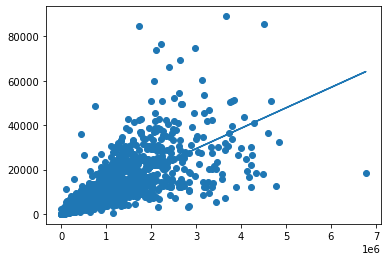

In [31]:
# Scipy’s Linear Regression
# Undertanding if there are predictin errors
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv('Fortnite_players_stats.csv')
xi = data['Solo score']
yi = data['Solo kills']
slope, intercept, r, p, std_err = stats.linregress(xi, yi)

def myfunc(x):
    return slope * x + intercept

mymodel = list(map(myfunc, xi))
plt.scatter(xi, yi)
plt.plot(xi, mymodel)
plt.show()

In [32]:
#Analysing imbalance 
targetMatches = data['Solo matches'].value_counts()
print(targetMatches)
print("Solo Score represents:",(len(targetMatches)/len(data))*100, "% of the dataset.")

targetWinratio = data['Duos winRatio'].value_counts()
#print(targetWinratio)
print("Duo win ratio represents:",(len(targetWinratio)/len(data))*100, "% of the dataset.")

4774    3
1518    3
9581    2
3644    2
6121    2
       ..
2296    1
2166    1
6378    1
5068    1
7105    1
Name: Solo matches, Length: 1370, dtype: int64
Solo Score represents: 95.47038327526133 % of the dataset.
Duo win ratio represents: 19.930313588850172 % of the dataset.


In [33]:
from sklearn import linear_model
## based on solo win ratio predict duo win ratio
soloWinRatioX = data[['Solo winRatio']]
duoWinRatioY = data['Duos winRatio']

regr = linear_model.LinearRegression()
regr.fit(soloWinRatioX, duoWinRatioY)
# The model's regression coefficients
print(regr.coef_)

[0.83461503]


In [34]:
predicted = regr.predict([[20]])
print(predicted)

[23.82635807]


/Users/jeisse.rocha/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [56]:
#for regression metrics, use variance explanation for absolute and squered error
X_train, X_test, y_train, y_test = train_test_split(soloWinRatioX, duoWinRatioY, test_size=0.33, random_state=42)
# initialize and fit to your train data and predict on test data

regr.fit(X_train, y_train)
preds = regr.predict(X_test)
# evaluate
mean_absolute_error(y_test, preds) == np.mean(np.abs(y_test - preds))
# get the variance of (absolute) residuals
np.var(np.abs(y_test - preds))
resultQ1a = np.var((y_test - preds))
print('mean_absolute_error:', resultQ1a)

resultQ1s = mean_squared_error(soloWinRatioX, duoWinRatioY, squared=False)

print('mean_squared_error:', resultQ1s)

mean_absolute_error: 32.93554416813547
mean_squared_error: 8.718309461164313


In [51]:
## based on number of Solo kills predict Solo winRatio
# The more you kill enemies, more often you gonna win?
soloKillsX = data[['Solo kd']]
soloWinRatioY = data['Solo winRatio']

regr = linear_model.LinearRegression()
regr.fit(soloKillsX, soloWinRatioY)
# The model's regression coefficients
print(regr.coef_)

[3.93996792]


In [50]:
# first matches you are mostly playing aganst easy bots so easy to kill, the more you play, more you face high level players
predicted = regr.predict([[4]])
print(predicted)

[13.45764659]


/Users/jeisse.rocha/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [54]:
#for regression metrics, use variance explanation for absolute and squered error
X_train, X_test, y_train, y_test = train_test_split(soloMatchesX, soloWinRatioY, test_size=0.33, random_state=42)
# initialize and fit to your train data and predict on test data

regr.fit(X_train, y_train)
preds = regr.predict(X_test)
# evaluate
mean_absolute_error(y_test, preds) == np.mean(np.abs(y_test - preds))
# get the variance of (absolute) residuals
np.var(np.abs(y_test - preds))
resultQ2a = np.var((y_test - preds))
print('mean_absolute_error:', resultQ2a)

resultQ2s = mean_squared_error(soloKillsX, soloWinRatioY, squared=False)

print('mean_squared_error:', resultQ2s)

mean_absolute_error: 6.735083039613258
mean_squared_error: 5.332080615799033


In [22]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

X = data[['Solo winRatio','Solo matches']]
y = data['Solo winRatio']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:          Solo winRatio   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.576e+28
Date:                Mon, 15 Aug 2022   Prob (F-statistic):               0.00
Time:                        20:16:51   Log-Likelihood:                 38338.
No. Observations:                1435   AIC:                        -7.667e+04
Df Residuals:                    1432   BIC:                        -7.665e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.882e-13   2.99e-14      9.630